In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.ticker as mtick
import toolkit as tk
%matplotlib inline     

In [2]:
base = "classic"
target = "sputnik"
benchlist = [base,target]
Q = [list(tk.run_benchmark("VM", benchlist)),
     list(tk.run_benchmark("VM", benchlist)),
     list(tk.run_benchmark("VM", benchlist))]

in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\classic\benchmarks\benchvm
	executing: go run benchmark.go
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\sputnik\benchmarks\benchvm
	executing: go run benchmark.go
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\classic\benchmarks\benchvm
	executing: go run benchmark.go
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\sputnik\benchmarks\benchvm
	executing: go run benchmark.go
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\classic\benchmarks\benchvm
	executing: go run benchmark.go
in the dir C:\Projects\_GoPkg_\src\github.com\sudachen\playground\branch\sputnik\benchmarks\benchvm
	executing: go run benchmark.go


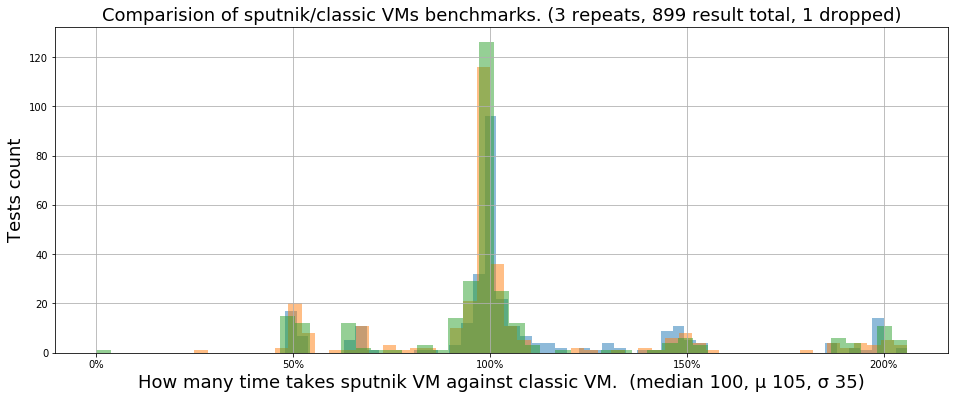

In [3]:
Max = None
while True:
    L = [[x.active for x in tk.collect(tk.extract(q), target, tk.time_percent_of, base) 
          if Max is None or x.active < Max] for q in Q]
    P = pd.Series([v for q in L for v in q])
    if P.std() < 100:
        break
    Max = P.max()        
        
total, mean, median, std = P.size, P.mean(), P.median(), P.std()
S = [pd.Series([x for x in q if x >= mean-std*3 and x <= mean+std*3]) for q in L]
drop = total-sum(q.size for q in S)

n_bins=int(std*1.5)
alpha=0.5
fig,ax = plt.subplots(figsize=(16,6))
for s in S: s.hist(bins=n_bins, alpha=alpha)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Tests count', fontsize=18)
ax.set_xlabel(
    'How many time takes {} VM against {} VM.  (median {:.0f}, μ {:.0f}, σ {:.0f})'.
        format(target, base, median, mean, std), 
    fontsize=18)
ax.set_title(
    'Comparision of {}/{} VMs benchmarks. ({} repeats, {} result total, {} dropped)'.
        format(target, base, len(L), total, drop), 
    fontsize=18)

plt.show()
